In [81]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
sample = data['data']  # выборка
targ = data['target']

In [16]:
samples = ([[],[],[]]) # разделим выборку по компонентам
a=[[],[],[]] 
cov=[[],[],[]]
for i in np.arange(0,150):
    samples[targ[i]].append(list(sample[i]))
samples=np.array(samples)
for i in [0,1,2]:
    a[i]=samples[i].mean(axis=0)
    X = []
    for j in samples[i]: #построение матрицы X
        X.append(j - a[i])
    X = np.array(X)
    cov[i] = 1/49 * (X.transpose() @ X) # 1/49 как в стандартной функции или 1/50 как в условии
    print("{} класс".format(i+1)+"\nОценка a\n",a[i])
    print("Матрица ковариаций\n",cov[i])

1 класс
Оценка a
 [ 5.006  3.418  1.464  0.244]
Матрица ковариаций
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
2 класс
Оценка a
 [ 5.936  2.77   4.26   1.326]
Матрица ковариаций
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
3 класс
Оценка a
 [ 6.588  2.974  5.552  2.026]
Матрица ковариаций
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Все небходимые данные у нас уже есть: оценка a для каждой подвыборки сохранена в массиве a[]. Матрицы ковариаций для проекций на координаты - подматрицы соответствующих оцененных матриц ковариаций для 4-мерного вектора (лежат в cov[]) 

In [162]:
def densityForProj(x,y,s,k,i,grid): # вычисление плотности | x,y - координаты, s,k - координаты проекций,
                                    # i - номер компоненты смеси, grid - сетка
    return sps.multivariate_normal.pdf((grid[0, x, y], grid[1, x, y]), mean = [a[i][s],a[i][k]],
                    cov = [[cov[i][s][s],cov[i][s][k]],[cov[i][s][k],cov[i][k][k]]]) 

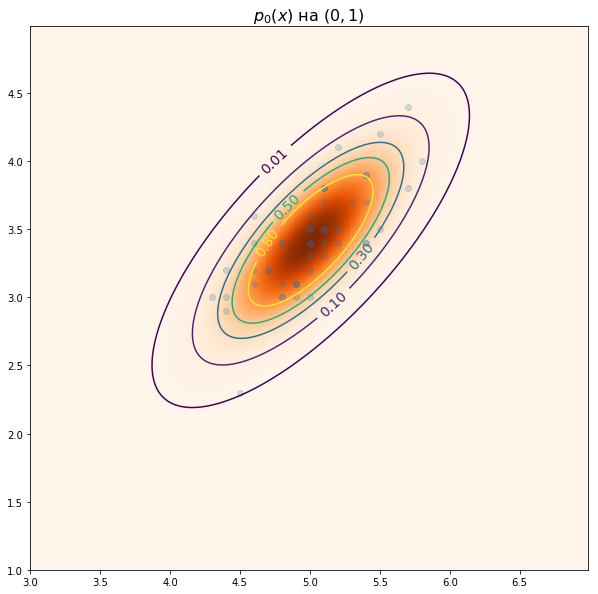

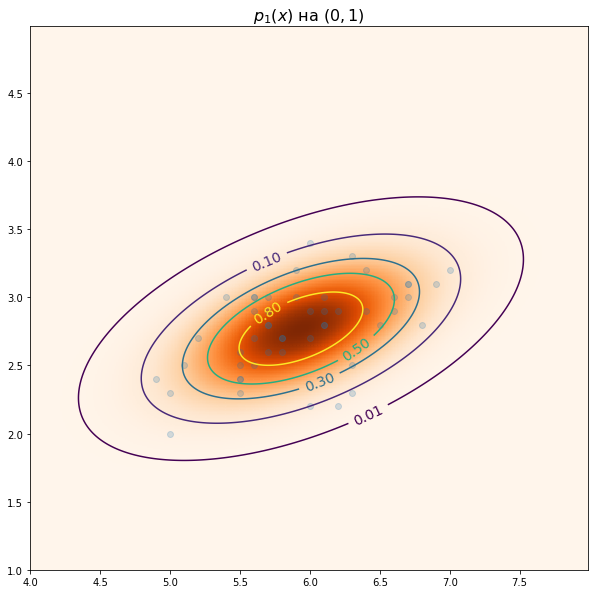

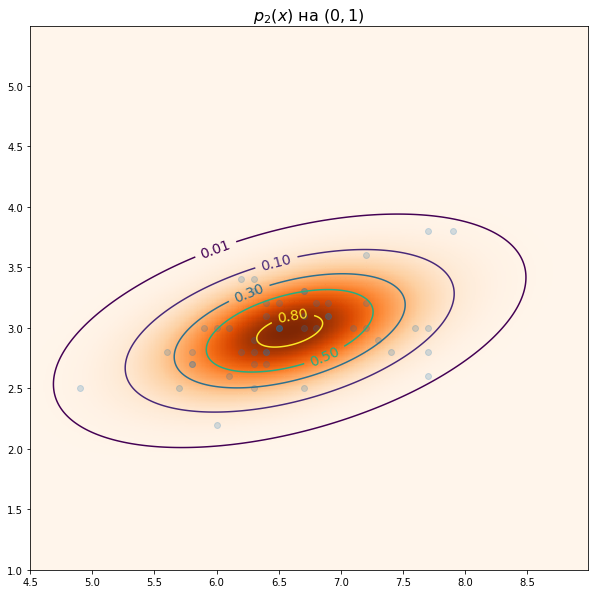

In [44]:
'''проекция на (0,1)'''
# 0
grid = np.mgrid[3:7:0.01, 1:5:0.01] # сетка
density = np.array([[densityForProj(i,j,0,1,0,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[0][:,0],samples[0][:,1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_0(x)$ на $(0,1)$",fontsize=16)
plt.show()

# 1
grid = np.mgrid[4:8:0.01, 1:5:0.01] # сетка
density = np.array([[densityForProj(i,j,0,1,1,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[1][:,0],samples[1][:,1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_1(x)$ на $(0,1)$",fontsize=16)
plt.show()

# 2
grid = np.mgrid[4.5:9:0.01, 1:5.5:0.01] # сетка
density = np.array([[densityForProj(i,j,0,1,2,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[2][:,0],samples[2][:,1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_2(x)$ на $(0,1)$",fontsize=16)
plt.show()

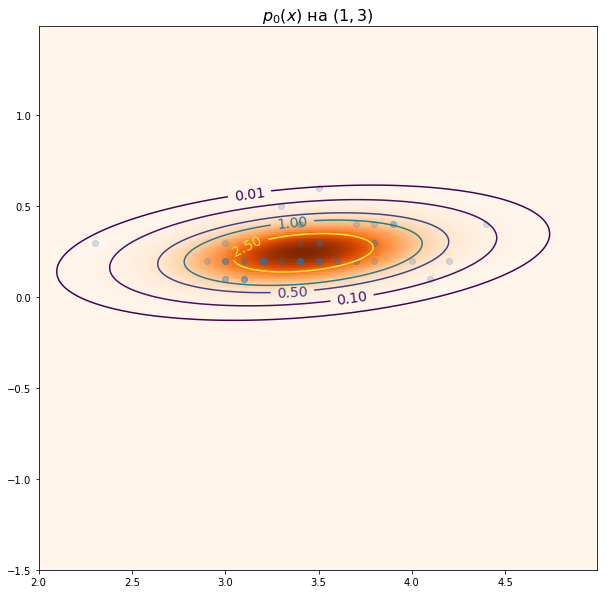

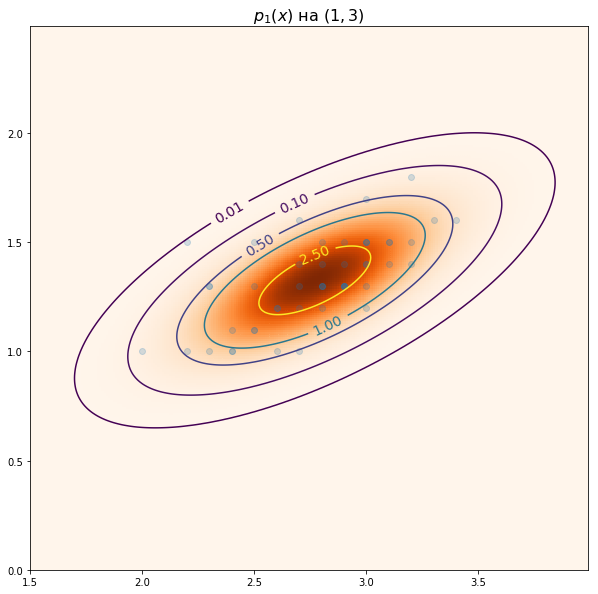

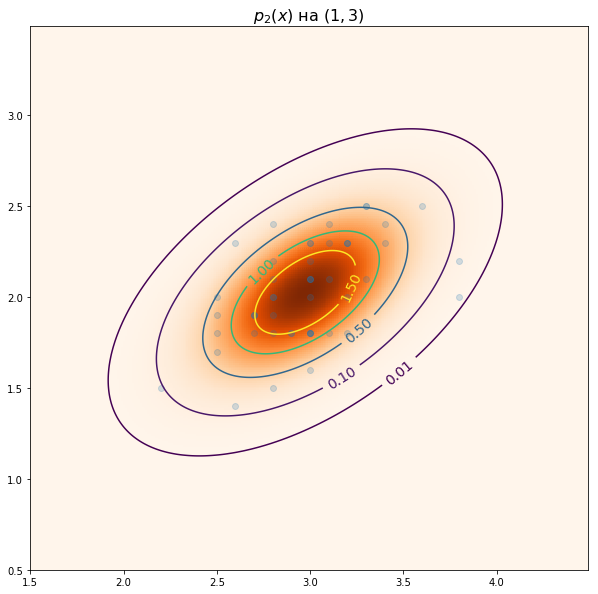

In [64]:
'''проекция на (1,3)'''
# 0
grid = np.mgrid[2:5:0.01, -1.5:1.5:0.01] # сетка
density = np.array([[densityForProj(i,j,1,3,0,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[0][:,1],samples[0][:,3], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1, 2.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_0(x)$ на $(1,3)$",fontsize=16)
plt.show()

# 1
grid = np.mgrid[1.5:4:0.01, 0:2.5:0.01] # сетка
density = np.array([[densityForProj(i,j,1,3,1,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[1][:,1],samples[1][:,3], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1, 2.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_1(x)$ на $(1,3)$",fontsize=16)
plt.show()

# 2
grid = np.mgrid[1.5:4.5:0.01, 0.5:3.5:0.01] # сетка
density = np.array([[densityForProj(i,j,1,3,2,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[2][:,1],samples[2][:,3], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1, 1.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_2(x)$ на $(1,3)$",fontsize=16)
plt.show()

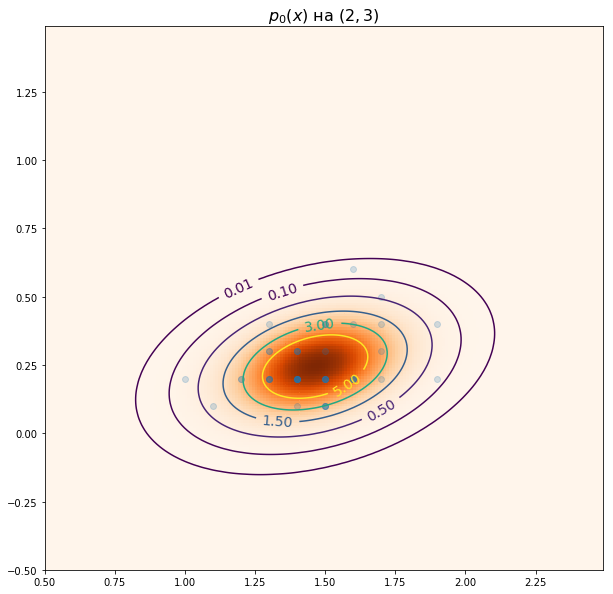

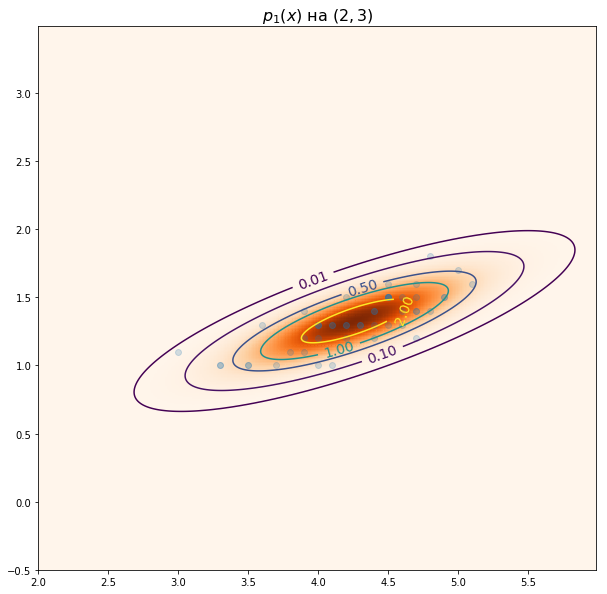

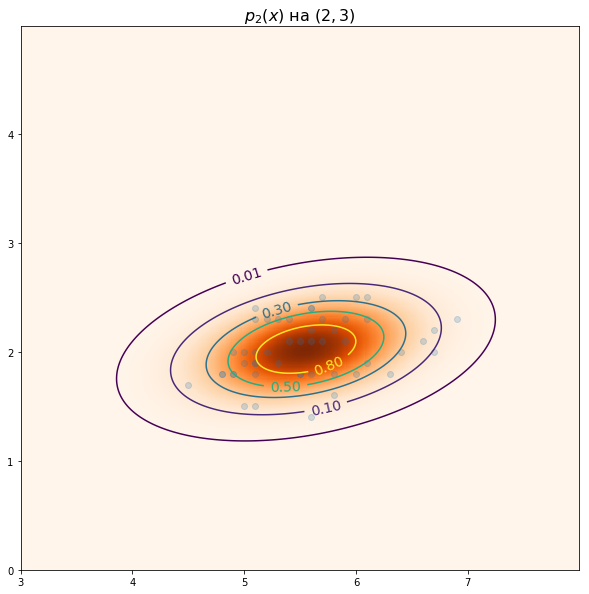

In [79]:
'''проекция на (2,3)'''
# 0
grid = np.mgrid[0.5:2.5:0.01, -0.5:1.5:0.01] # сетка
density = np.array([[densityForProj(i,j,2,3,0,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[0][:,2],samples[0][:,3], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1.5, 3, 5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_0(x)$ на $(2,3)$",fontsize=16)
plt.show()

# 1
grid = np.mgrid[2:6:0.01, -0.5:3.5:0.01] # сетка
density = np.array([[densityForProj(i,j,2,3,1,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[1][:,2],samples[1][:,3], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1, 2])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_1(x)$ на $(2,3)$",fontsize=16)
plt.show()

# 2
grid = np.mgrid[3:8:0.01, 0:5:0.01] # сетка
density = np.array([[densityForProj(i,j,2,3,2,grid)  for j in range(grid[0].shape[1])]
                                       for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(samples[2][:,2],samples[2][:,3], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p_2(x)$ на $(2,3)$",fontsize=16)
plt.show()

Все компоненты встречаются одинаковое количество раз $\Rightarrow P(T=0) = P(T=1) = P(T=2) = \frac{1}{3}$

In [82]:
print("E(X|I{T!=1}=1)=",(np.append(samples[1],samples[2],axis=0)).mean(axis=0))
print("E(X|I{T!=2}=1)=",(np.append(samples[0],samples[2],axis=0)).mean(axis=0))
print("E(X|I{T!=3}=1)=",(np.append(samples[0],samples[1],axis=0)).mean(axis=0))

E(X|I{T!=1}=1)= [ 6.262  2.872  4.906  1.676]
E(X|I{T!=2}=1)= [ 5.797  3.196  3.508  1.135]
E(X|I{T!=3}=1)= [ 5.471  3.094  2.862  0.785]


$p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k) \Rightarrow p_{ X|I \{T \neq i\}} \left( x | 1 \right) = p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k | T \neq i) = \sum\limits_{j \in \lbrace 0,1,2 \rbrace \setminus \lbrace i \rbrace} \frac{1}{2} p_j(x)$ 

In [163]:
def getDens2(x,y,s,k,l,grid): # вычисление плотности | x,y - координаты, s,k - координаты проекции,
                              # l - исключенная координата смеси, grid - сетка
    f=0
    for i in range(0,3):
        if i!=l:
            f += (1/2)*sps.multivariate_normal.pdf((grid[0, x, y], grid[1, x, y]), mean = [a[i][s],a[i][k]],
                    cov = [[cov[i][s][s],cov[i][s][k]],[cov[i][s][k],cov[i][k][k]]])
    return f 

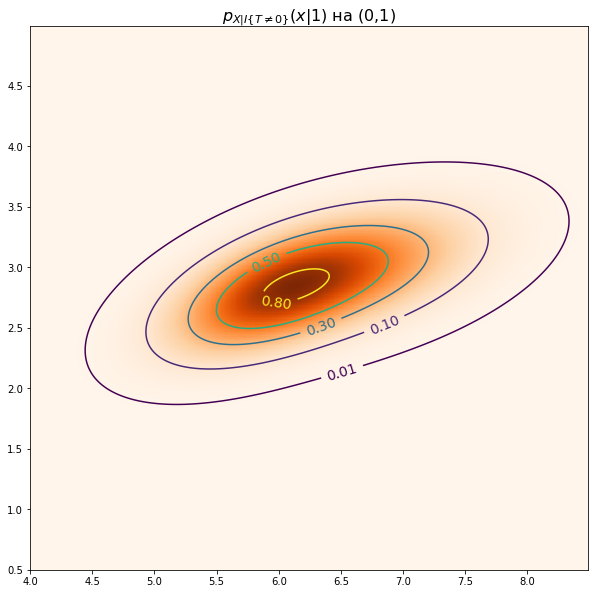

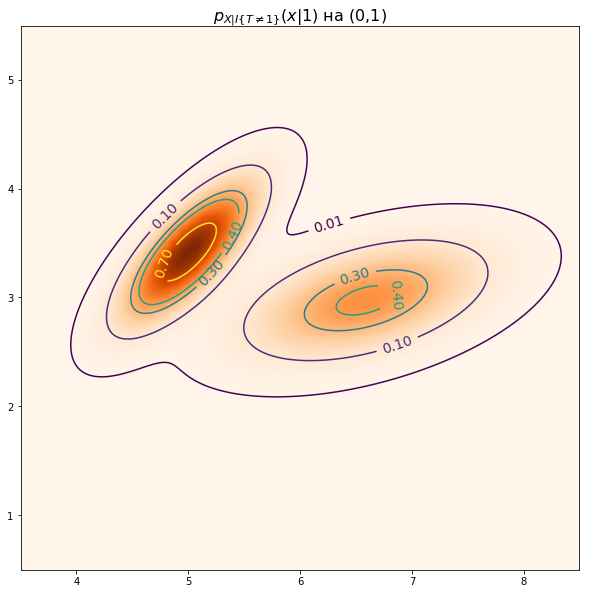

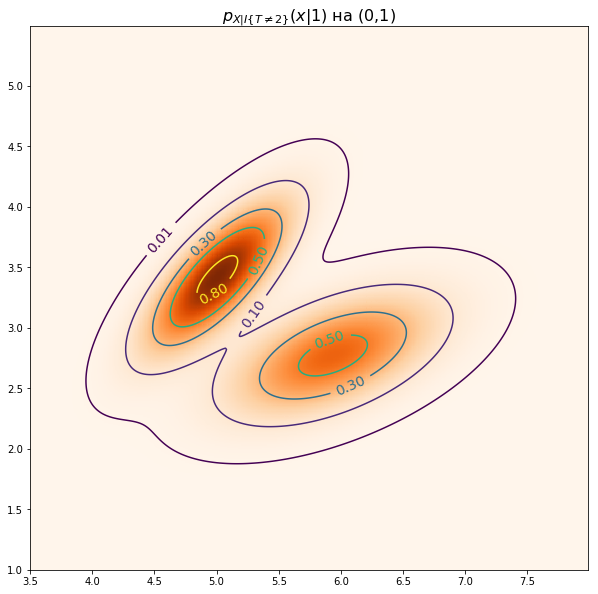

In [101]:
'''(0,1)'''
# 0
grid = np.mgrid[4:8.5:0.01, 0.5:5:0.01]
density = np.array([[getDens2(i,j,0,1,0,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 0\\}}\\left(x \\left| 1\\right.\\right)$ на (0,1)', fontsize=16)
plt.show()

# 1
grid = np.mgrid[3.5:8.5:0.01, 0.5:5.5:0.01]
density = np.array([[getDens2(i,j,0,1,1,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.4, 0.7])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 1\\}}\\left(x \\left| 1\\right.\\right)$ на (0,1)', fontsize=16)
plt.show()

# 2
grid = np.mgrid[3.5:8:0.01, 1:5.5:0.01]
density = np.array([[getDens2(i,j,0,1,2,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 2\\}}\\left(x \\left| 1\\right.\\right)$ на (0,1)', fontsize=16)
plt.show()

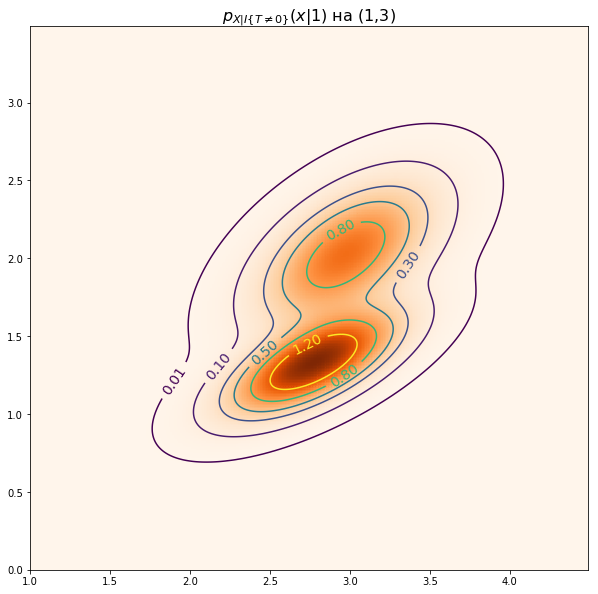

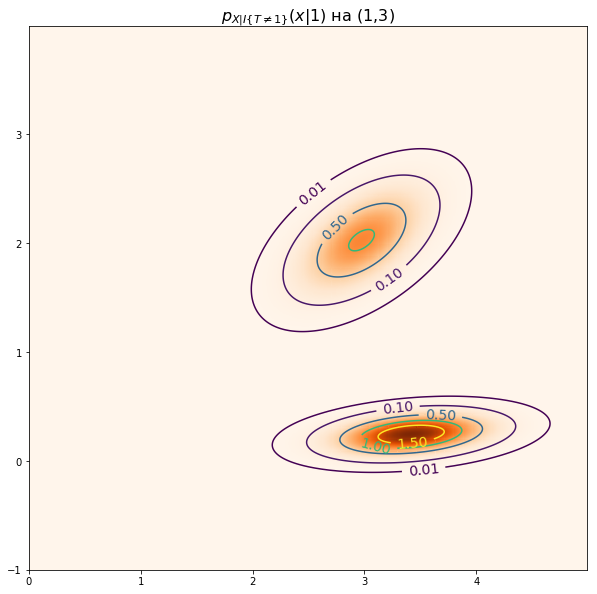

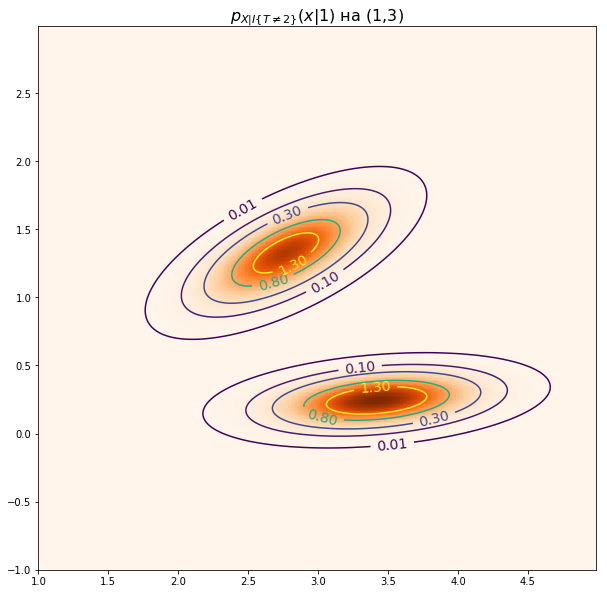

In [124]:
'''(1,3)'''
# 0
grid = np.mgrid[1:4.5:0.01, 0:3.5:0.01]
density = np.array([[getDens2(i,j,1,3,0,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8, 1.2])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 0\\}}\\left(x \\left| 1\\right.\\right)$ на (1,3)', fontsize=16)
plt.show()

# 1
grid = np.mgrid[0:5:0.01, -1:4:0.01]
density = np.array([[getDens2(i,j,1,3,1,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1, 1.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 1\\}}\\left(x \\left| 1\\right.\\right)$ на (1,3)', fontsize=16)
plt.show()

# 2
grid = np.mgrid[1:5:0.01, -1:3:0.01]
density = np.array([[getDens2(i,j,1,3,2,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.8, 1.3])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 2\\}}\\left(x \\left| 1\\right.\\right)$ на (1,3)', fontsize=16)
plt.show()

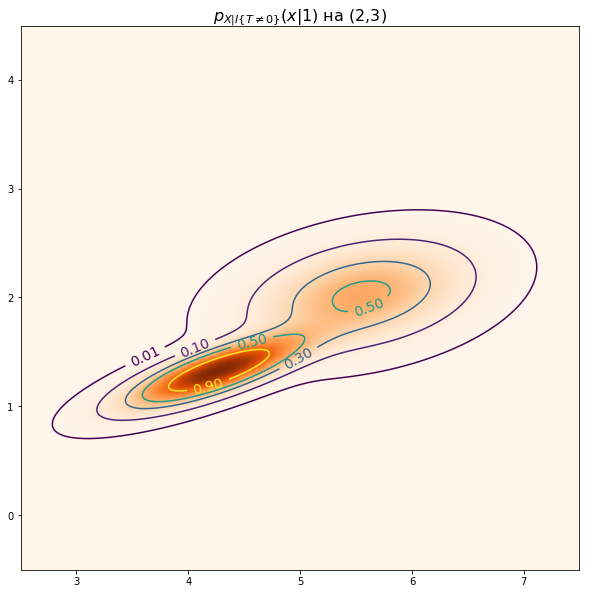

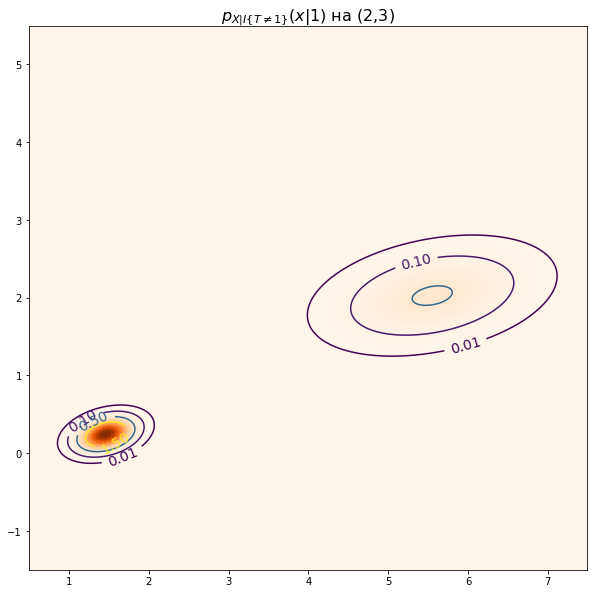

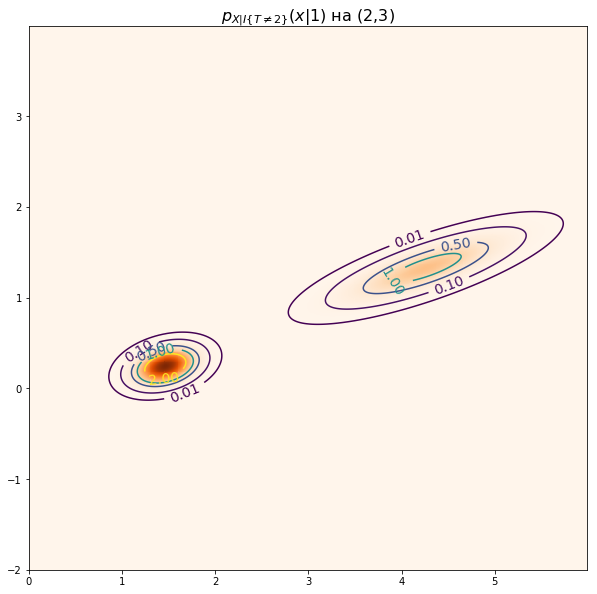

In [142]:
'''(2,3)'''
# 0
grid = np.mgrid[2.5:7.5:0.01, -0.5:4.5:0.01]
density = np.array([[getDens2(i,j,2,3,0,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.9])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 0\\}}\\left(x \\left| 1\\right.\\right)$ на (2,3)', fontsize=16)
plt.show()

# 1
grid = np.mgrid[0.5:7.5:0.01, -1.5:5.5:0.01]
density = np.array([[getDens2(i,j,2,3,1,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 1\\}}\\left(x \\left| 1\\right.\\right)$ на (2,3)', fontsize=16)
plt.show()

# 2
grid = np.mgrid[0:6:0.01, -2:4:0.01]
density = np.array([[getDens2(i,j,2,3,2,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.5, 1, 2])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 2\\}}\\left(x \\left| 1\\right.\\right)$ на (2,3)', fontsize=16)
plt.show()

In [164]:
def getClass1(x): # получение класса для элемента выборки | x - вектор
    ps=[]
    for i in [0,1,2]:
            ps.append(sps.multivariate_normal.pdf(x, mean = a[i], cov = cov[i]))
    ps=np.array(ps)
    return np.argmax(ps)
numMistakes = 0
for i in range(0,150):
    if targ[i] != getClass1(sample[i]):
        numMistakes += 1
print("Доля ошибок: ", numMistakes/1.5,"%")

Доля ошибок:  2.0 %


В дальшейшем белым цветом обозначаем 0 компоненту смеси, голубым - 1, синим - 2. Элементы выборки выделим красным, зеленым и черным соответственно.

In [165]:
def getClass(x,y,s,k,grid): # получение класса для элемента выборки относительно проекции | x,y - координаты,
                            # s,k - координаты проекции, grid - сетка
    ps=[]
    for i in range(0,3):
            ps.append(sps.multivariate_normal.pdf((grid[0, x, y], grid[1, x, y]), mean = [a[i][s],a[i][k]],
                    cov = [[cov[i][s][s],cov[i][s][k]],[cov[i][s][k],cov[i][k][k]]]))
    ps=np.array(ps)
    return np.argmax(ps)

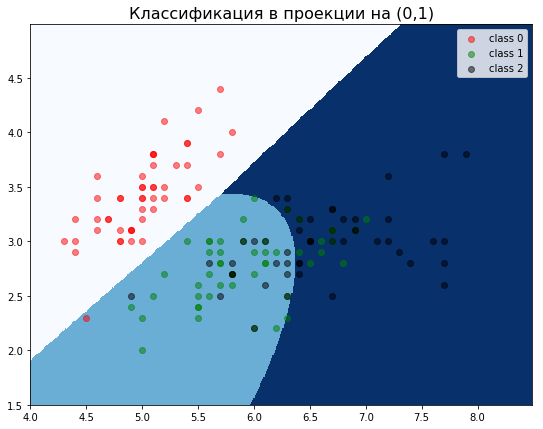

In [157]:
grid = np.mgrid[4:8.5:0.01, 1.5:5:0.01]
density = np.array([[getClass(i,j,0,1,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize = (9,7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Blues')
plt.scatter(samples[0][:,0],samples[0][:,1], alpha=0.5, color='red',label="class 0")
plt.scatter(samples[1][:,0],samples[1][:,1], alpha=0.5, color='green',label="class 1")
plt.scatter(samples[2][:,0],samples[2][:,1], alpha=0.5, color='black',label="class 2")
plt.title("Классификация в проекции на (0,1)",fontsize=16)
plt.legend()
plt.show()

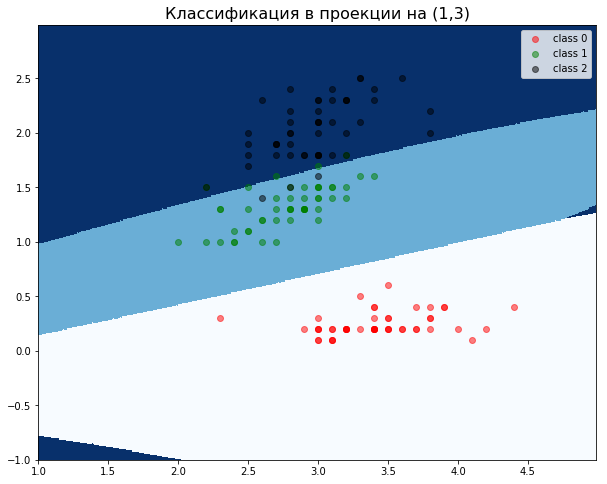

In [158]:
grid = np.mgrid[1:5:0.01, -1:3:0.01]
density = np.array([[getClass(i,j,1,3,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(10, 8))
plt.pcolormesh(grid[0], grid[1], density, cmap='Blues')
plt.scatter(samples[0][:,1],samples[0][:,3], alpha=0.5, color='red',label="class 0")
plt.scatter(samples[1][:,1],samples[1][:,3], alpha=0.5, color='green',label="class 1")
plt.scatter(samples[2][:,1],samples[2][:,3], alpha=0.5, color='black',label="class 2")
plt.title("Классификация в проекции на (1,3)",fontsize=16)
plt.legend()
plt.show()

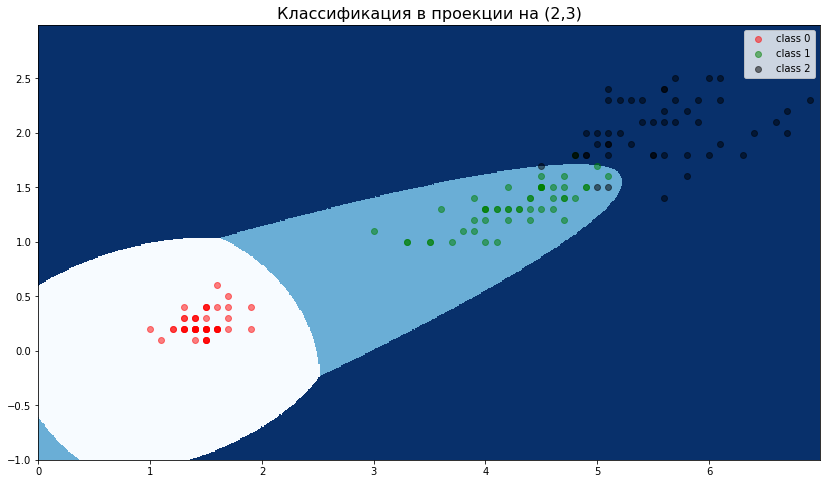

In [161]:
grid = np.mgrid[0:7:0.01, -1:3:0.01]
density = np.array([[getClass(i,j,2,3,grid)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(14, 8))
plt.pcolormesh(grid[0], grid[1], density, cmap='Blues')
plt.scatter(samples[0][:,2],samples[0][:,3], alpha=0.5, color='red',label="class 0")
plt.scatter(samples[1][:,2],samples[1][:,3], alpha=0.5, color='green',label="class 1")
plt.scatter(samples[2][:,2],samples[2][:,3], alpha=0.5, color='black',label="class 2")
plt.title("Классификация в проекции на (2,3)",fontsize=16)
plt.legend()
plt.show()